In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-10-09 14:23:01.663979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 14:23:02.623784: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 128
learning_rate = 3e-4
batch_per_file_size = 8
decay_rate = 0.9635
node_embedding_size = 8
layers = [186, 74, 70, 85]

dataset = LayoutDataset(
    batch_size, train_sample_fraction=1.0,
    subset=None, build_tfrecords=False,
    batch_per_file_size=batch_per_file_size
)

mlp = LayoutMLP(
    batch_size,
    learning_rate=learning_rate,
    mask_max_len=dataset.n_config_nodes_upper_limit,
    batch_per_file_size=batch_per_file_size,
    decay_rate=decay_rate,
    node_embedding_size=node_embedding_size,
    validation_frequency=15_000,
    validations_without_improvement=3,
    layer_sizes=layers
)
mlp.train(dataset, None)

2023-10-09 14:23:06.366651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 14:23:06.481599: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 14:23:06.481902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

iteration 100 training loss 2.792922 lr 0.00030
iteration 200 training loss 2.664057 lr 0.00030
iteration 300 training loss 2.8251598 lr 0.00030
iteration 400 training loss 2.4289353 lr 0.00030
iteration 500 training loss 2.3174093 lr 0.00030
iteration 600 training loss 2.4921076 lr 0.00030
iteration 700 training loss 2.4785569 lr 0.00030
iteration 800 training loss 2.3632178 lr 0.00030
iteration 900 training loss 2.7076962 lr 0.00030
iteration 1000 training loss 2.2709043 lr 0.00030
iteration 1100 training loss 2.302134 lr 0.00030
iteration 1200 training loss 2.4863145 lr 0.00030
iteration 1300 training loss 2.4416263 lr 0.00030
iteration 1400 training loss 1.5429976 lr 0.00030
iteration 1500 training loss 1.87151 lr 0.00030
iteration 1600 training loss 1.5550157 lr 0.00030
iteration 1700 training loss 2.2816849 lr 0.00030
iteration 1800 training loss 2.1234877 lr 0.00030
iteration 1900 training loss 2.3172162 lr 0.00030
iteration 2000 training loss 1.6991601 lr 0.00030
iteration 2100

iteration 16100 training loss 1.758006 lr 0.00029
iteration 16200 training loss 1.7003769 lr 0.00029
iteration 16300 training loss 2.0702772 lr 0.00029
iteration 16400 training loss 1.5256099 lr 0.00029
iteration 16500 training loss 1.5276996 lr 0.00029
iteration 16600 training loss 1.6288899 lr 0.00029
iteration 16700 training loss 1.5907987 lr 0.00029
iteration 16800 training loss 1.1464463 lr 0.00029
iteration 16900 training loss 1.494789 lr 0.00029
iteration 17000 training loss 1.6504545 lr 0.00029
iteration 17100 training loss 1.4667244 lr 0.00029
iteration 17200 training loss 1.7523221 lr 0.00029
iteration 17300 training loss 1.3199544 lr 0.00029
iteration 17400 training loss 1.8388476 lr 0.00029
iteration 17500 training loss 1.2684578 lr 0.00029
iteration 17600 training loss 1.617214 lr 0.00029
iteration 17700 training loss 1.6625084 lr 0.00029
iteration 17800 training loss 1.710565 lr 0.00029
iteration 17900 training loss 1.7466617 lr 0.00029
iteration 18000 training loss 1.585

iteration 31900 training loss 1.3058732 lr 0.00027
iteration 32000 training loss 1.6347834 lr 0.00027
iteration 32100 training loss 1.2549734 lr 0.00027
iteration 32200 training loss 1.552192 lr 0.00027
iteration 32300 training loss 1.3332745 lr 0.00027
iteration 32400 training loss 1.7098008 lr 0.00027
iteration 32500 training loss 1.0191145 lr 0.00027
iteration 32600 training loss 1.6069705 lr 0.00027
iteration 32700 training loss 1.8031485 lr 0.00027
iteration 32800 training loss 1.3499544 lr 0.00027
iteration 32900 training loss 1.7731934 lr 0.00027
iteration 33000 training loss 1.7148054 lr 0.00027
iteration 33100 training loss 1.4464616 lr 0.00027
iteration 33200 training loss 1.5062459 lr 0.00027
iteration 33300 training loss 1.1293955 lr 0.00027
iteration 33400 training loss 1.6478161 lr 0.00027
iteration 33500 training loss 1.4581785 lr 0.00027
iteration 33600 training loss 1.2225657 lr 0.00027
iteration 33700 training loss 2.0364363 lr 0.00027
iteration 33800 training loss 1.

iteration 47700 training loss 1.5998317 lr 0.00026
iteration 47800 training loss 1.3753217 lr 0.00026
iteration 47900 training loss 1.3063936 lr 0.00026
iteration 48000 training loss 1.7711787 lr 0.00026
iteration 48100 training loss 1.428894 lr 0.00026
iteration 48200 training loss 1.8879656 lr 0.00026
iteration 48300 training loss 1.2074919 lr 0.00026
iteration 48400 training loss 1.7825669 lr 0.00026
iteration 48500 training loss 1.4715297 lr 0.00026
iteration 48600 training loss 1.8175112 lr 0.00026
iteration 48700 training loss 1.332457 lr 0.00026
iteration 48800 training loss 1.1849108 lr 0.00026
iteration 48900 training loss 1.4251802 lr 0.00026
iteration 49000 training loss 1.9121184 lr 0.00026
iteration 49100 training loss 1.8809601 lr 0.00026
iteration 49200 training loss 1.0532011 lr 0.00026
iteration 49300 training loss 1.6420956 lr 0.00026
iteration 49400 training loss 1.5910422 lr 0.00026
iteration 49500 training loss 1.4171467 lr 0.00026
iteration 49600 training loss 1.6

iteration 63500 training loss 1.8349851 lr 0.00024
iteration 63600 training loss 1.6814442 lr 0.00024
iteration 63700 training loss 1.4206192 lr 0.00024
iteration 63800 training loss 1.5327095 lr 0.00024
iteration 63900 training loss 1.0312164 lr 0.00024
iteration 64000 training loss 1.2632548 lr 0.00024
iteration 64100 training loss 1.4479735 lr 0.00024
iteration 64200 training loss 1.1845798 lr 0.00024
iteration 64300 training loss 1.4612908 lr 0.00024
iteration 64400 training loss 1.2409476 lr 0.00024
iteration 64500 training loss 1.5649092 lr 0.00024
iteration 64600 training loss 1.7089069 lr 0.00024
iteration 64700 training loss 1.2642767 lr 0.00024
iteration 64800 training loss 1.8192345 lr 0.00024
iteration 64900 training loss 1.8512788 lr 0.00024
iteration 65000 training loss 1.0608456 lr 0.00024
iteration 65100 training loss 1.0945796 lr 0.00024
iteration 65200 training loss 0.97123486 lr 0.00024
iteration 65300 training loss 1.1940616 lr 0.00024
iteration 65400 training loss 

iteration 79200 training loss 1.20169 lr 0.00023
iteration 79300 training loss 1.0685811 lr 0.00023
iteration 79400 training loss 1.5550301 lr 0.00023
iteration 79500 training loss 1.4761751 lr 0.00023
iteration 79600 training loss 1.4115486 lr 0.00023
iteration 79700 training loss 1.2690946 lr 0.00023
iteration 79800 training loss 1.3911504 lr 0.00023
iteration 79900 training loss 1.3927549 lr 0.00023
iteration 80000 training loss 1.1301589 lr 0.00023
iteration 80100 training loss 1.1490077 lr 0.00022
iteration 80200 training loss 1.3598448 lr 0.00022
iteration 80300 training loss 1.281762 lr 0.00022
iteration 80400 training loss 1.2747768 lr 0.00022
iteration 80500 training loss 1.1446462 lr 0.00022
iteration 80600 training loss 1.129798 lr 0.00022
iteration 80700 training loss 1.1985542 lr 0.00022
iteration 80800 training loss 1.0844108 lr 0.00022
iteration 80900 training loss 1.9478192 lr 0.00022
iteration 81000 training loss 1.3203924 lr 0.00022
iteration 81100 training loss 1.067

iteration 95000 training loss 1.3205066 lr 0.00021
iteration 95100 training loss 1.2159141 lr 0.00021
iteration 95200 training loss 1.659268 lr 0.00021
iteration 95300 training loss 1.2403952 lr 0.00021
iteration 95400 training loss 1.2023664 lr 0.00021
iteration 95500 training loss 2.2544382 lr 0.00021
iteration 95600 training loss 1.2935715 lr 0.00021
iteration 95700 training loss 1.0054598 lr 0.00021
iteration 95800 training loss 1.7817662 lr 0.00021
iteration 95900 training loss 1.1987567 lr 0.00021
iteration 96000 training loss 1.3181249 lr 0.00021
iteration 96100 training loss 1.4385165 lr 0.00021
iteration 96200 training loss 1.7524103 lr 0.00021
iteration 96300 training loss 0.98190325 lr 0.00021
iteration 96400 training loss 1.163597 lr 0.00021
iteration 96500 training loss 1.2322003 lr 0.00021
iteration 96600 training loss 1.0482789 lr 0.00021
iteration 96700 training loss 1.2365344 lr 0.00021
iteration 96800 training loss 1.3586309 lr 0.00021
iteration 96900 training loss 1.

iteration 110600 training loss 1.3768196 lr 0.00020
iteration 110700 training loss 0.9714439 lr 0.00020
iteration 110800 training loss 1.3628048 lr 0.00020
iteration 110900 training loss 1.2849076 lr 0.00020
iteration 111000 training loss 0.91617984 lr 0.00020
iteration 111100 training loss 1.2220528 lr 0.00020
iteration 111200 training loss 1.590597 lr 0.00020
iteration 111300 training loss 1.1248897 lr 0.00020
iteration 111400 training loss 1.0080267 lr 0.00020
iteration 111500 training loss 1.3781875 lr 0.00020
iteration 111600 training loss 1.1424705 lr 0.00020
iteration 111700 training loss 1.3775811 lr 0.00020
iteration 111800 training loss 1.2708316 lr 0.00020
iteration 111900 training loss 1.3648722 lr 0.00020
iteration 112000 training loss 1.3069497 lr 0.00020
iteration 112100 training loss 1.7356193 lr 0.00020
iteration 112200 training loss 1.2355328 lr 0.00020
iteration 112300 training loss 1.5048704 lr 0.00020
iteration 112400 training loss 1.2963618 lr 0.00020
iteration 11

iteration 126100 training loss 1.7874215 lr 0.00019
iteration 126200 training loss 1.2439849 lr 0.00019
iteration 126300 training loss 0.843331 lr 0.00019
iteration 126400 training loss 1.0628545 lr 0.00019
iteration 126500 training loss 1.278321 lr 0.00019
iteration 126600 training loss 1.2668579 lr 0.00019
iteration 126700 training loss 1.1041929 lr 0.00019
iteration 126800 training loss 1.8282151 lr 0.00019
iteration 126900 training loss 1.2579726 lr 0.00019
iteration 127000 training loss 1.3778356 lr 0.00019
iteration 127100 training loss 1.4150069 lr 0.00019
iteration 127200 training loss 1.2081628 lr 0.00019
iteration 127300 training loss 1.078953 lr 0.00019
iteration 127400 training loss 1.3835889 lr 0.00019
iteration 127500 training loss 1.428805 lr 0.00019
iteration 127600 training loss 1.3766154 lr 0.00019
iteration 127700 training loss 1.3064673 lr 0.00019
iteration 127800 training loss 1.3372222 lr 0.00019
iteration 127900 training loss 1.0834796 lr 0.00019
iteration 128000

iteration 141600 training loss 1.0837111 lr 0.00018
iteration 141700 training loss 1.3878936 lr 0.00018
iteration 141800 training loss 1.4826216 lr 0.00018
iteration 141900 training loss 0.9901589 lr 0.00018
iteration 142000 training loss 1.0416234 lr 0.00018
iteration 142100 training loss 1.5680257 lr 0.00018
iteration 142200 training loss 1.6633946 lr 0.00018
iteration 142300 training loss 1.5432925 lr 0.00018
iteration 142400 training loss 1.109575 lr 0.00018
iteration 142500 training loss 1.1283649 lr 0.00018
iteration 142600 training loss 1.6135545 lr 0.00018
iteration 142700 training loss 1.5938314 lr 0.00018
iteration 142800 training loss 1.2905416 lr 0.00018
iteration 142900 training loss 1.4469743 lr 0.00018
iteration 143000 training loss 1.3506593 lr 0.00018
iteration 143100 training loss 1.5527321 lr 0.00018
iteration 143200 training loss 1.3186327 lr 0.00018
iteration 143300 training loss 1.4393053 lr 0.00018
iteration 143400 training loss 1.5658255 lr 0.00018
iteration 143

iteration 157100 training loss 1.794552 lr 0.00017
iteration 157200 training loss 1.2022253 lr 0.00017
iteration 157300 training loss 1.0455357 lr 0.00017
iteration 157400 training loss 1.5387973 lr 0.00017
iteration 157500 training loss 1.4365114 lr 0.00017
iteration 157600 training loss 1.5750617 lr 0.00017
iteration 157700 training loss 1.3406143 lr 0.00017
iteration 157800 training loss 1.6180995 lr 0.00017
iteration 157900 training loss 1.1209108 lr 0.00017
iteration 158000 training loss 1.2060876 lr 0.00017
iteration 158100 training loss 1.4956712 lr 0.00017
iteration 158200 training loss 1.2196571 lr 0.00017
iteration 158300 training loss 1.0134037 lr 0.00017
iteration 158400 training loss 1.1337428 lr 0.00017
iteration 158500 training loss 1.4044338 lr 0.00017
iteration 158600 training loss 0.9085933 lr 0.00017
iteration 158700 training loss 0.9374451 lr 0.00017
iteration 158800 training loss 1.4483689 lr 0.00017
iteration 158900 training loss 1.1852919 lr 0.00017
iteration 159

## Evaluate validation set

In [3]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

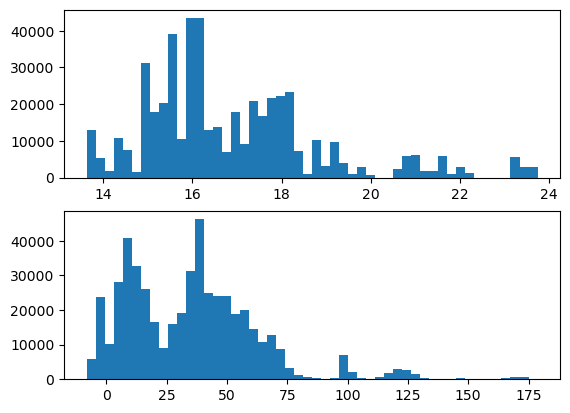

In [4]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

Text(0.5, 1.0, "b'layout:xla:random:bert_pretraining.4x4.fp16'")

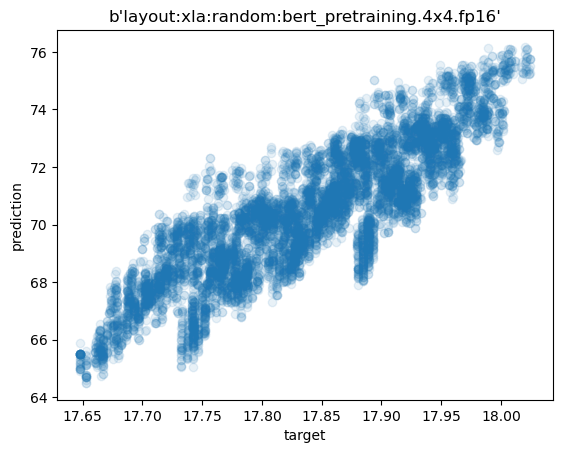

In [19]:
x_lin = np.linspace(15, 25, 100)
#plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(10_000)
graph_id = np.random.choice(val_df['ID'].unique())
random_sample = val_df[val_df['ID'] == graph_id]

plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-10000.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

Text(0, 0.5, 'squared error')

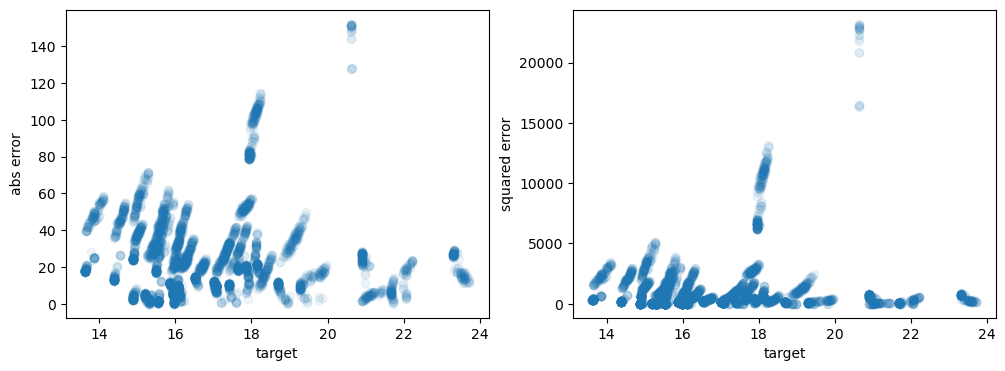

In [20]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
#plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [21]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
layout:nlp:default:albert_en_xlarge_batch_size_16_test                               34366;38022;29628;34371;34400;30782;34348;3802...
layout:nlp:default:bert_en_cased_L-12_H-768_A-12_batch_size_16_test                  40921;40918;44078;16431;23918;30351;16425;4877...
layout:nlp:default:bert_multi_cased_L-12_H-768_A-12_batch_size_16_train              23921;11254;3259;25673;25691;25691;3256;3256;1...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test      12004;31014;12000;12028;67745;11980;12175;1196...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_64_train     15239;25951;21803;39586;27532;37951;38959;2839...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_32_test      55091;39313;31947;70771;55077;27953;59230;8476...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_64_train     41013;369;369;41136;5551;1258;389;4744;4748;47...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H

In [ ]:
val_df

In [ ]:
val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3])).unique()

In [ ]:
def compute_layout_score_group(df):
    score, _ = kendalltau(df['prediction'], df['target'])
    return score

val_df['subset'] = val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
for subset in val_df['subset'].unique():
    mean = np.mean(val_df[val_df['subset'] == subset].groupby('ID').apply(compute_layout_score_group))
    print(subset, mean)

In [ ]:
np.mean([0.368, 0.137, 0.738, 0.346, 0.85])

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [22]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'layout:nlp:random:6c1101f6231f4d1722c3b9f6d1...,19,54.329151
1,b'layout:nlp:random:6c1101f6231f4d1722c3b9f6d1...,3,56.180000
2,b'layout:nlp:random:6c1101f6231f4d1722c3b9f6d1...,10,56.345779
3,b'layout:nlp:random:6c1101f6231f4d1722c3b9f6d1...,2,54.949951
4,b'layout:nlp:random:6c1101f6231f4d1722c3b9f6d1...,1,55.352615
...,...,...,...
49997,b'layout:xla:random:fbaa8bb6a1aed9988281085c91...,996,65.319031
49998,b'layout:xla:random:fbaa8bb6a1aed9988281085c91...,989,70.392319
49999,b'layout:xla:random:fbaa8bb6a1aed9988281085c91...,957,66.414734
50000,b'layout:xla:random:fbaa8bb6a1aed9988281085c91...,997,66.107758


In [23]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
layout:nlp:default:016ac66a44a906a695afd2228509046a    35;49;882;306;541;659;904;302;476;954;243;314;...
layout:nlp:default:171b0513d8874a427ccfa46d136fbadc    223;422;732;843;985;665;794;248;605;465;127;18...
layout:nlp:default:23559853d9702baaaacbb0c83fd32266    247;859;691;622;852;687;894;112;96;563;305;63;...
layout:nlp:default:29886a50d55cfe77a9497bc906c76ce9    498;727;295;196;314;974;34;493;954;252;286;733...
layout:nlp:default:32531d07a084b319dce484f53a4cf3fc    584;132;647;745;793;750;552;6;964;851;313;697;...
layout:nlp:default:38524e2ff135ded55b5286407e7af6b7    919;718;636;350;27;961;337;834;820;476;902;775...
layout:nlp:default:3a0c5517a87df8d82fd637b83298a3ba    339;40;634;883;803;986;221;944;413;964;12;5;52...
layout:nlp:default:492c7a94d559aa4a88769142d2a68362    148;49;461;310;534;807;483;630;886;940;819;915...
layout:nlp:default:58cc2e418c3a8a19b871e15964b534ad    787;840;231;89;512;830;584;443;166;285;786;782...
layout:nlp:default:60880ed76de53f4d7a1b960b24f20f7d 

In [24]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('layout_none_test_prediction_10_09_15_36.csv')

In [ ]:
plt.hist(np.abs(mlp.dense_layer_1.kernel.numpy().flatten()), bins=50)